# ANTcircuits example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eoscircuits import ant
import olftrans as olf
import olftrans.data
import olftrans.fbl
import numpy as np
import networkx as nx
from neurokernel.LPU.InputProcessors.StepInputProcessor import StepInputProcessor
import matplotlib.pyplot as plt
import typing as tp
import pandas as pd
import seaborn as sns

/mnt/server-home/tingkai/Project/FBL/olftrans/olftrans/olftrans.py:210: RuntimeWarning: invalid value encountered in power
  res = np.atleast_1d(np.power(c * (y - b) / (a - (y - b)), 1.0 / n))
/mnt/server-home/tingkai/Project/FBL/olftrans/olftrans/olftrans.py:210: RuntimeWarning: invalid value encountered in power
  res = np.atleast_1d(np.power(c * (y - b) / (a - (y - b)), 1.0 / n))


In [3]:
from eoscircuits.plot import plot_data, plot_spikes

## Load Larva Affinity Values

In [4]:
receptor_names = olf.fbl.LARVA.affinities.loc['ethyl acetate'].index.values.astype(str)
affinities = olf.fbl.LARVA.affinities.loc['ethyl acetate'].values

<AxesSubplot:xlabel='OR'>

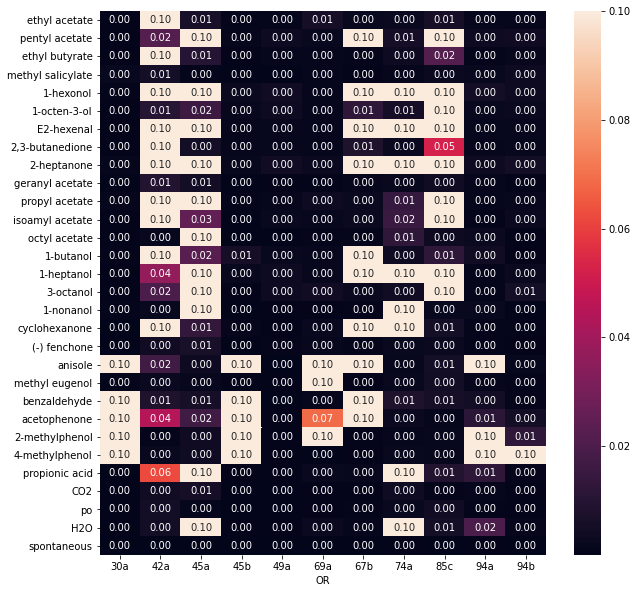

In [5]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(olf.fbl.LARVA.affinities, annot=True, fmt='.2f')

In [6]:
cfg = ant.ANTConfig(NO=2, affs=affinities, receptors=receptor_names, node_params={'osn_bsgs':{'sigma': 0.0025}})

In [7]:
ant_circ = ant.ANTCircuit.create_from_config(cfg)

In [9]:
dt = 1e-5
dur = 4
steps = int((dur+dt/2)//dt)
t = np.arange(steps)*dt

In [10]:
fi = StepInputProcessor('conc', ant_circ.inputs['conc'], 100., start=1, stop=3)
fi, fo, lpu = ant_circ.simulate(
    t, fi, 
    record_var_list=[
        ('I', sum(ant_circ.config.osn_otps, [])),
        ('spike_state', sum(ant_circ.config.osn_bsgs, []))
    ]
)

OlfTrans: Number of OTP: 22
OlfTrans: Number of NoisyConnorStevens: 22
OlfTrans: Number of Input: {'conc': 22}


OlfTrans:   0%|          | 567/400000 [00:00<01:10, 5664.18it/s]

Compilation of executable circuit completed in 0.9267311096191406 seconds


OlfTrans: 100%|██████████| 400000/400000 [00:53<00:00, 7477.01it/s]


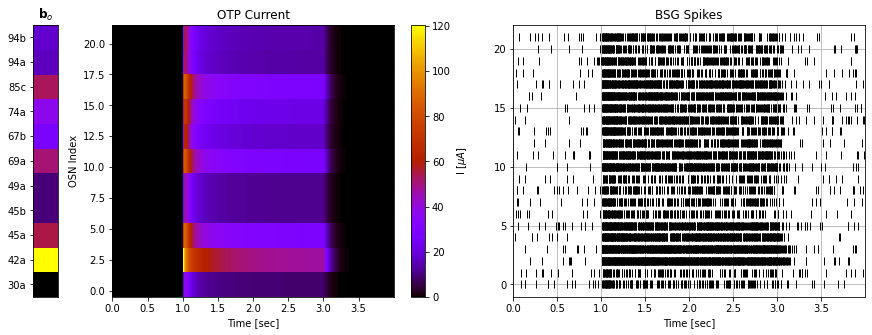

In [11]:
%matplotlib inline
I = fo.get_output(var='I')
spike_times = fo.get_output(var='spike_state')

fig,axes = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios': [1,10,10]})
_ = plot_data(I, t=t, ax=axes[1], cmap=plt.cm.gnuplot, cax=True, cbar_kw={'label': 'I [$\mu A$]'})
_ = plot_spikes(spike_times, ax=axes[2], markersize=8)
_ = axes[2].set_xlim([0, t.max()])

axes[0].imshow(np.log10(ant_circ.config.affs)[:,None], cmap=plt.cm.gnuplot, origin='lower')
axes[0].set_xticks([])
axes[0].set_yticks(np.arange(ant_circ.config.NR))
axes[0].set_yticklabels(ant_circ.config.receptors)
axes[0].set_title('$\mathbf{b}_o$')
axes[1].set_ylabel('OSN Index')
axes[1].set_xlabel('Time [sec]')
axes[1].set_title('OTP Current')
axes[2].set_title('BSG Spikes')
axes[2].set_xlabel('Time [sec]')
axes[2].grid()
plt.show()

## Change Affinity Values

In [12]:
ant_circ.set_affinities([.1,.5], receptors=['30a', '42a'])
fi = StepInputProcessor('conc', ant_circ.inputs['conc'], 100., start=1, stop=3)
fi, fo, lpu = ant_circ.simulate(
    t, fi, 
    record_var_list=[
        ('I', sum(ant_circ.config.osn_otps, [])),
        ('spike_state', sum(ant_circ.config.osn_bsgs, []))
    ])

OlfTrans: Number of OTP: 22
OlfTrans: Number of NoisyConnorStevens: 22
OlfTrans: Number of Input: {'conc': 22}


OlfTrans:   0%|          | 467/400000 [00:00<01:25, 4661.78it/s]

Compilation of executable circuit completed in 0.8721866607666016 seconds


OlfTrans: 100%|██████████| 400000/400000 [00:55<00:00, 7172.90it/s]


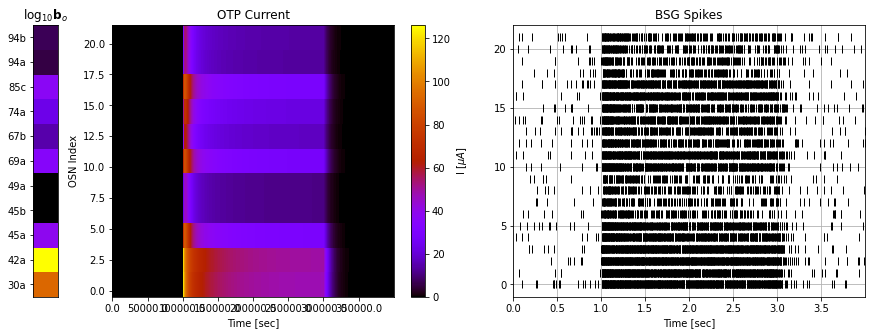

In [13]:
%matplotlib inline
I = fo.get_output(var='I')
spike_times = fo.get_output(var='spike_state')
fig,axes = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios': [1,10,10]})
_ = plot_data(I, ax=axes[1], cmap=plt.cm.gnuplot, cax=True, cbar_kw={'label': 'I [$\mu A$]'})
_ = plot_spikes(spike_times, ax=axes[2], markersize=8)
_ = axes[2].set_xlim([0, t.max()])

axes[0].imshow(np.log10(ant_circ.config.affs)[:,None], cmap=plt.cm.gnuplot, origin='lower')
axes[0].set_yticks(np.arange(ant_circ.config.NR))
axes[0].set_yticklabels(ant_circ.config.receptors)
axes[0].set_xticks([])
axes[0].set_title('$\log_{10} \mathbf{b}_o$')
axes[1].set_ylabel('OSN Index')
axes[1].set_xlabel('Time [sec]')
axes[1].set_title('OTP Current')
axes[2].set_title('BSG Spikes')
axes[2].set_xlabel('Time [sec]')
axes[2].grid()
plt.show()

## Change BSG params

In [14]:
ant_circ.set_bsg_params('sigma', 0.)
fi = StepInputProcessor('conc', ant_circ.inputs['conc'], 100., start=1, stop=3)
fi, fo, lpu = ant_circ.simulate(
    t, fi, 
    record_var_list=[
        ('I', sum(ant_circ.config.osn_otps, [])),
        ('spike_state', sum(ant_circ.config.osn_bsgs, []))
    ])

OlfTrans: Number of OTP: 22
OlfTrans: Number of NoisyConnorStevens: 22
OlfTrans: Number of Input: {'conc': 22}


OlfTrans:   0%|          | 746/400000 [00:00<00:53, 7456.75it/s]

Compilation of executable circuit completed in 0.9477653503417969 seconds


OlfTrans: 100%|██████████| 400000/400000 [00:53<00:00, 7465.67it/s]


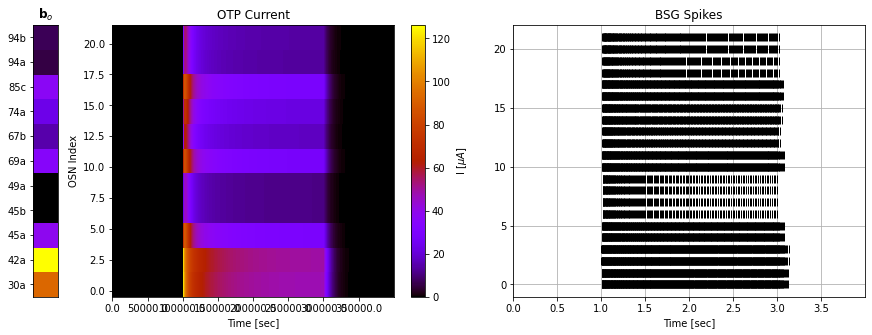

In [15]:
%matplotlib inline
I = fo.get_output(var='I')
spike_times = fo.get_output(var='spike_state')

fig,axes = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios': [1,10,10]})
_ = plot_data(I, ax=axes[1], cmap=plt.cm.gnuplot, cax=True, cbar_kw={'label': 'I [$\mu A$]'})
_ = plot_spikes(spike_times, ax=axes[2], markersize=8)
_ = axes[2].set_xlim([0, t.max()])

axes[0].imshow(np.log10(ant_circ.config.affs)[:,None], cmap=plt.cm.gnuplot, origin='lower')
axes[0].set_xticks([])
axes[0].set_yticks(np.arange(ant_circ.config.NR))
axes[0].set_yticklabels(ant_circ.config.receptors)
axes[0].set_title('$\mathbf{b}_o$')
axes[1].set_ylabel('OSN Index')
axes[1].set_xlabel('Time [sec]')
axes[1].set_title('OTP Current')
axes[2].set_title('BSG Spikes')
axes[2].set_xlabel('Time [sec]')
axes[2].grid()
plt.show()

## Change Number of OSNs per Receptor Type

In [29]:
ant_circ.set_NO(10)
fi = StepInputProcessor('conc', ant_circ.inputs['conc'], 100., start=1, stop=3)
fi, fo, lpu = ant_circ.simulate(
    t, fi, 
    record_var_list=[
        ('I', sum(ant_circ.config.osn_otps, [])),
        ('spike_state', sum(ant_circ.config.osn_bsgs, []))
    ])

OlfTrans: Number of OTP: 110
OlfTrans: Number of NoisyConnorStevens: 110
OlfTrans: Number of Input: {'conc': 110}


OlfTrans:   0%|          | 556/400000 [00:00<01:11, 5555.69it/s]

Compilation of executable circuit completed in 0.9562509059906006 seconds


OlfTrans: 100%|██████████| 400000/400000 [00:51<00:00, 7715.20it/s]


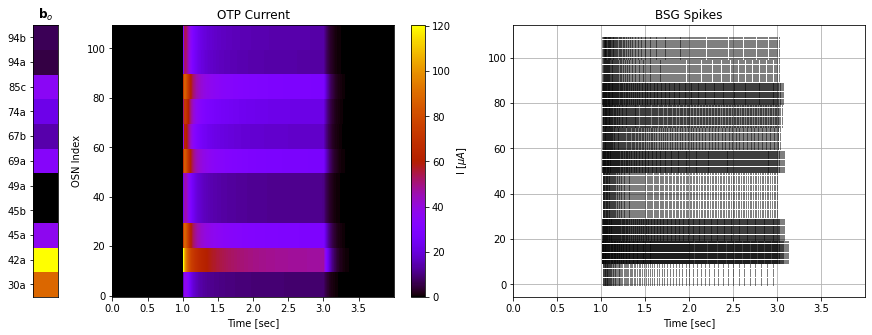

In [31]:
%matplotlib inline
I = fo.get_output(var='I')
spike_times = fo.get_output(var='spike_state')

fig,axes = plt.subplots(1,3, figsize=(15,5), gridspec_kw={'width_ratios': [1,10,10]})
_ = plot_data(I, t=t, ax=axes[1], cmap=plt.cm.gnuplot, cax=True, cbar_kw={'label': 'I [$\mu A$]'})
_ = plot_spikes(spike_times, ax=axes[2], markersize=1)
_ = axes[2].set_xlim([0, t.max()])

axes[0].imshow(np.log10(ant_circ.config.affs)[:,None], cmap=plt.cm.gnuplot, origin='lower')
axes[0].set_xticks([])
axes[0].set_yticks(np.arange(ant_circ.config.NR))
axes[0].set_yticklabels(ant_circ.config.receptors)
axes[0].set_title('$\mathbf{b}_o$')
axes[1].set_ylabel('OSN Index')
axes[1].set_xlabel('Time [sec]')
axes[1].set_title('OTP Current')
axes[2].set_title('BSG Spikes')
axes[2].set_xlabel('Time [sec]')
axes[2].grid()
plt.show()